<a href="https://colab.research.google.com/github/Karima277/fine-tune-stable-diffusion-on-Cartoon-dataset/blob/main/finetuneSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine Tuning STABLE DIFFUSION on Cartoon Dataset using Hugging face diffuseres library

## Before running the script, we make sure  install the library from source:

In [1]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install .

Cloning into 'diffusers'...
remote: Enumerating objects: 75612, done.
remote: Counting objects: 100% (414/414), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 75612 (delta 233), reused 293 (delta 144), pack-reused 75198 (from 1)
Receiving objects: 100% (75612/75612), 54.25 MiB | 24.96 MiB/s, done.
Resolving deltas: 100% (55992/55992), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=3000098 sha256=04f4854e469ecea5c94b0bee771fb2a9a8ee6741be29bda22cc5a5da6f1a0362
  Stored in directory: /tmp/pip-ephem-wheel-cache-tvsmdzjj/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Succe

## Initialize an Accelerate environment:

In [2]:
from accelerate.utils import write_basic_config
write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

## Log to huggingface

In [3]:
from huggingface_hub import notebook_login
notebook_login()

## Navigate to the example folder with the training script and install the required dependencies

In [4]:
%cd examples/text_to_image
!pip install -r requirements.txt

/content/diffusers/examples/text_to_image
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: peft
    Found existing installation: peft 0.13.2
    Uninstalling peft-0.13.2:
      Successfully uninstalled peft-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the package

### move to cuda

In [5]:
import torch
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"

### import libraries we need

In [6]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from datasets import load_dataset
from diffusers import DDIMScheduler, DDPMPipeline
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Launch the script
Let’s train on the **rick_and_morty** captions dataset to generate our own Caertoon characters

In [ ]:
!accelerate launch \
  /content/diffusers/examples/text_to_image/train_text_to_image_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --dataset_name="qwertyaditya/rick_and_morty_image_and_text" \
  --dataloader_num_workers=1 \
  --resolution=256 \
  --center_crop \
  --random_flip \
  --train_batch_size=4 \
  --gradient_accumulation_steps=1 \
  --max_train_steps=1000 \
  --learning_rate=5e-04 \
  --max_grad_norm=1 \
  --lr_scheduler="cosine" \
  --lr_warmup_steps=0 \
  --output_dir="/content/drive/MyDrive/Cartoon_Lora_Output" \
  --push_to_hub \
  --hub_model_id="Cartoon-Lora" \
  --report_to=wandb \
  --checkpointing_steps=250 \
  --validation_prompt="A cartoon character in the forest" \
  --seed=1337

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

model.safetensors:  32% 1.11G/3.44G [00:43<01:07, 34.5MB/s]





model.safetensors:  40% 1.36G/3.44G [00:46<01:48, 19.2MB/s]



model.safetensors:  37% 1.28G/3.44G [00:45<01:20, 26.7MB/s]


model.safetensors:  33% 1.12G/3.44G [00:44<01:02, 37.4MB/s]





model.safetensors:  40% 1.37G/3.44G [00:46<01:27, 23.7MB/s]



model.safetensors:  37% 1.29G/3.44G [00:45<01:10, 30.5MB/s]




model.safetensors:  38% 1.32G/3.44G [00:46<01:13, 29.0MB/s]





model.safetensors:  40% 1.37G/3.44G [00:46<01:22, 25.1MB/s]



model.safetensors:  38% 1.29G/3.44G [00:45<01:02, 34.3MB/s]


model.safetensors:  33% 1.12G/3.44G [00:44<01:21, 28.5MB/s]




model.safetensors:  38% 1.32G/3.44G [00:47<01:09, 30.6MB/s]





model.safetensors:  40% 1.38G/3.44G [00:47<01:28, 23.2MB/s]




model.safetensors:  39% 1.33G/3.44G [00:47<00:59, 35.4MB/s]


model.safetensors:  33% 1.13G/3.44G [00:44<01:18, 29.6MB/s]





model.safetensors:  40% 1.38G

## Once training has been completed, we can use the model:

In [8]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("/content/drive/MyDrive/Cartoon_Lora_Output/checkpoint-1000", weight_name="pytorch_lora_weights.safetensors")
image = pipeline("A cartoon character in the forest").images[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

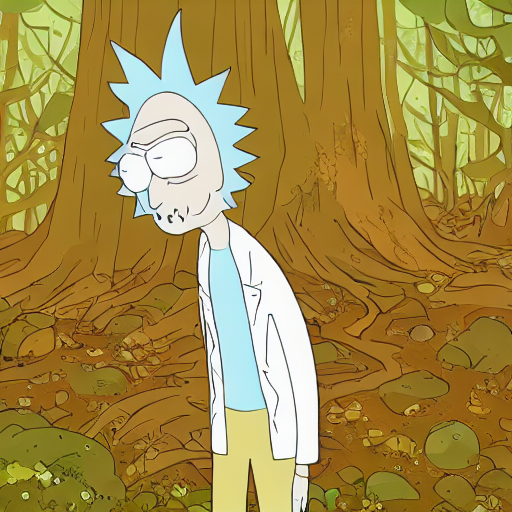

In [9]:
image.save("/content/drive/MyDrive/generated_cartoon.png")
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/generated_cartoon.png"))

  0%|          | 0/50 [00:00<?, ?it/s]

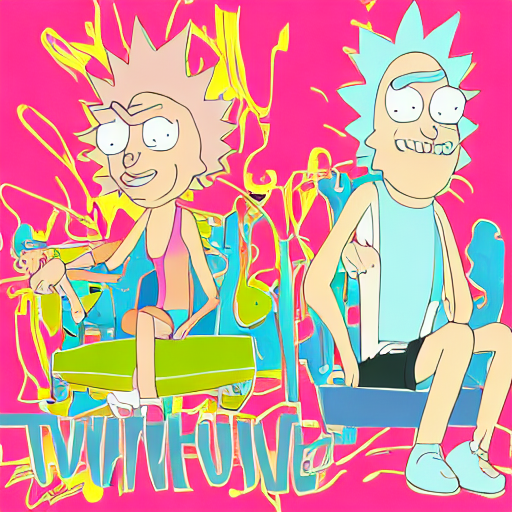

In [35]:
pipeline.load_lora_weights("/content/drive/MyDrive/Cartoon_Lora_Output/checkpoint-1000", weight_name="pytorch_lora_weights.safetensors")
image = pipeline("two cartoon characters sitting").images[0]

image.save("/content/drive/MyDrive/generated_cartoon1.png")
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/generated_cartoon1.png"))

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

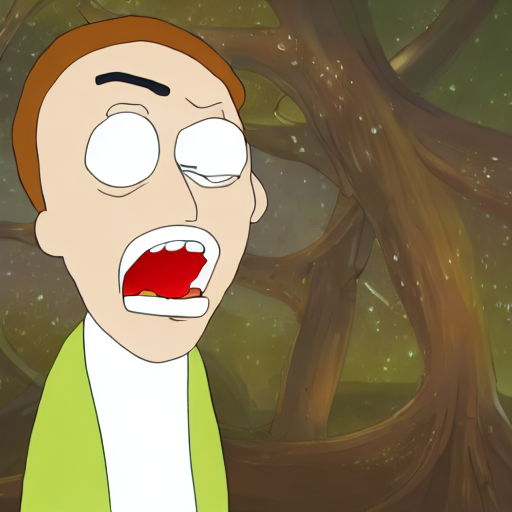

In [21]:
pipeline = AutoPipelineForText2Image.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("/content/drive/MyDrive/Cartoon_Lora_Output/checkpoint-1000", weight_name="pytorch_lora_weights.safetensors")
image = pipeline("a cartoon character with a surprised look on his face").images[0]

image.save("/content/drive/MyDrive/generated_cartoon2.png")
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/generated_cartoon2.png"))